UNDERSTANDING EFFECTIVE DATA VISUALIZATION USING PYTHON
======================================

**Dataset Description
Overview**

The titanic data has been split into two groups:

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. 

**Data Dictionary**
Variables	
<p>survival		0 = No, 1 = Yes<p>
<p>pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd<p>
<p>sex	Sex	<p>
<p>Age	Age in years	<p>
<p>sibsp	# of siblings / spouses aboard the Titanic<p>	
<p>parch	# of parents / children aboard the Titanic	<p>
<p>ticket	Ticket number	<p>
<p>fare	Passenger fare	<p>
<p>cabin	Cabin number	<p>
<p>embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton<p>
<p>Variable Notes<p>
<p>pclass: A proxy for socio-economic status (SES)<p>
<p>1st = Upper<p>
<p>2nd = Middle<p>
<p>3rd = Lower<p>
<p>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<p>
<p>sibsp: The dataset defines family relations in this way:<p>
<p>Sibling = brother, sister, stepbrother, stepsister<p>
<p>Spouse = husband, wife (mistresses and fiancés were ignored)<p>
<p>parch: The dataset defines family relations in this way:<p>
<p>Parent = mother, father<p>
<p>Child = daughter, son, stepdaughter, stepson<p>

Some children travelled only with a nanny, therefore parch=0 for them.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


warnings.filterwarnings('ignore')


In [2]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
#for visualizing basic information about my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.duplicated().sum()

107

In [28]:
df.age.median()

28.25

In [8]:
df=df.drop_duplicates()

In [24]:
df.deck.value_counts()

deck
C    59
B    46
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [65]:
df.embarked.value_counts()

embarked
S    568
C    155
Q     59
Name: count, dtype: int64

In [69]:
df.loc[df['embarked'].isnull()==True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [84]:
print(df['embarked'].mode()[0])
print(df['deck'].mode()[0])
print(df['embark_town'].mode()[0])

S
C
Southampton


In [77]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace= True)
df["deck"].fillna(df["deck"].mode()[0],inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0],inplace=True)

In [36]:
df.loc[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True


In [46]:
# Calculate average age grouped by the 'who' column
average_age_by_who = df.groupby('who')['age'].median().astype(float).round()

# Display the results
print(average_age_by_who)

who
child     5.0
man      31.0
woman    30.0
Name: age, dtype: float64


In [50]:
average_age_by_who=average_age_by_who.to_dict()

In [41]:
# Calculate average age grouped by the 'who' column
null_ages_by_who = df.groupby('who')['age'].apply(lambda x:x.isnull().sum())
# Display the results
print(null_ages_by_who)

who
child     0
man      69
woman    37
Name: age, dtype: int64


In [51]:
# Replace values in the 'age' column based on 'who' column
df['age'] = df.apply(lambda x:average_age_by_who[x['who']] if pd.isnull(x['age']) else x['age'],
    axis=1)

In [61]:
df.groupby('who')['age'].mean().round()

who
child     6.0
man      33.0
woman    32.0
Name: age, dtype: float64

In [63]:
df.duplicated().sum()

3

In [78]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,7,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,NaN,1,2,23.4500,2,2,2,0,7,2,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,2,0,1,1


In [15]:
#Replacing Null Values in the Age,Embarked,deck and embark_town columns
df["age"].fillna(df["age"].mean(),inplace= True)
df["embarked"].fillna(df["embarked"].mean(),inplace= True)
df["deck"].fillna(df["deck"].mode().iloc[0],inplace=True)
df["embark_town"].fillna(df["embark_town"].mode().iloc[0],inplace=True)

In [16]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,7,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,7,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


In [70]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidths=0,fmt=".1f")


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

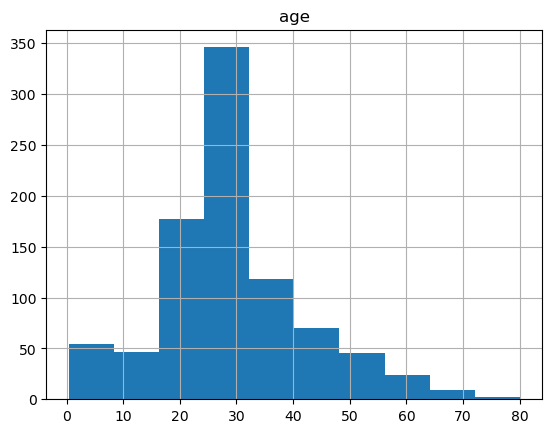

In [33]:
#This graph seems to be symmetrical about the peak of the histogram
df.hist("age")

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

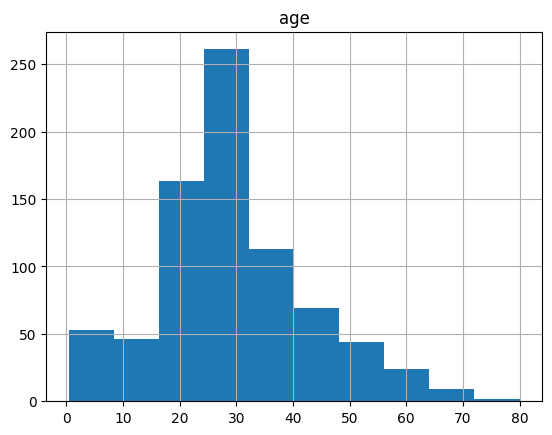

In [85]:
df.hist("age")

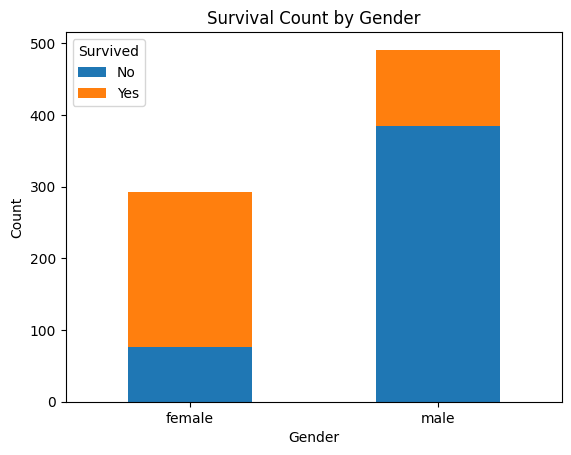

In [92]:
# Bar graph for survival count by gender
gender_counts = df.groupby('sex')['survived'].value_counts().unstack()
gender_counts.plot(kind='bar', stacked=True)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

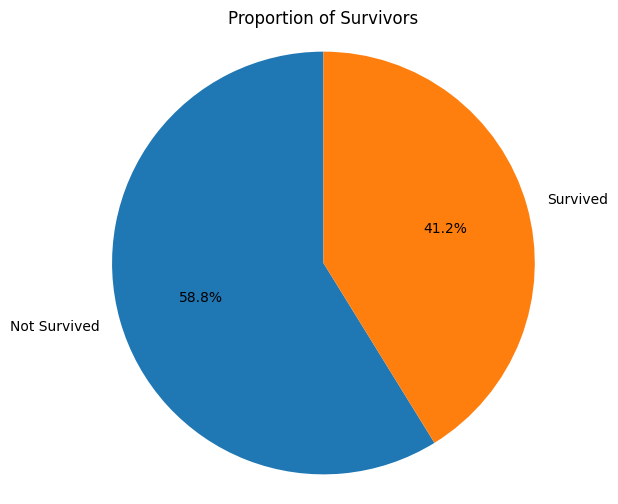

In [106]:
# Pie chart for proportion of survivors
survival_counts = df['survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Survivors')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


In [118]:
counts=df.groupby('sex')['survived'].value_counts().unstack().fillna(0)


survived,0,1
sex,,
female,76,217
male,385,106


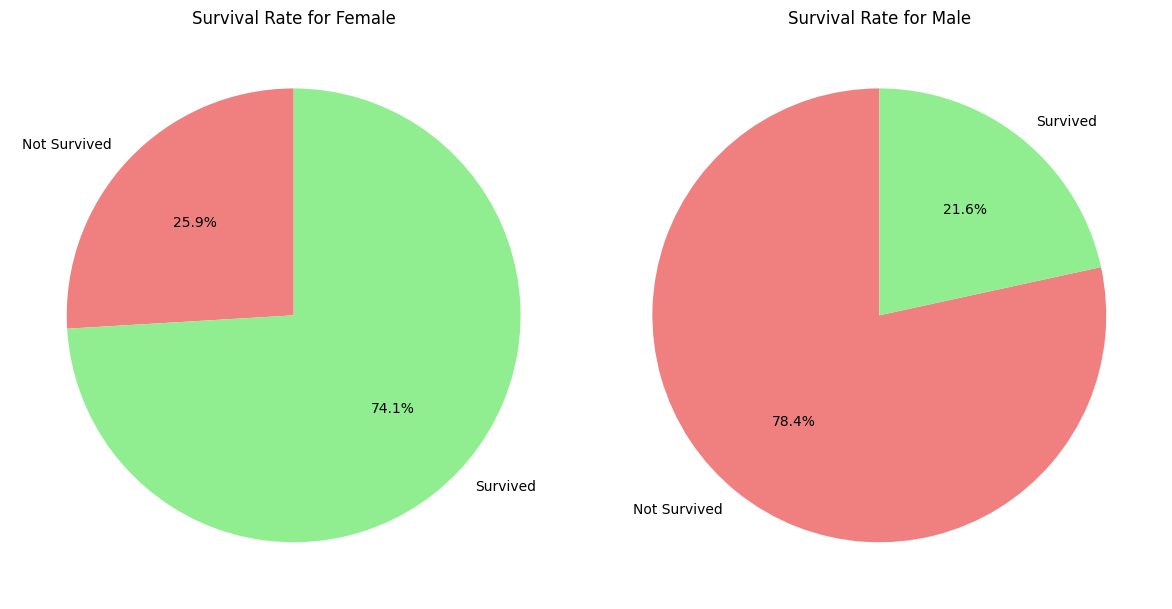

In [110]:
# Calculate the survival counts by sex
survival_counts = df.groupby('sex')['survived'].value_counts().unstack().fillna(0)

# Calculate survival rates
survival_rates = survival_counts.div(survival_counts.sum(axis=1), axis=0)

# Plot pie charts for each gender
plt.figure(figsize=(12, 6))

for i, gender in enumerate(survival_rates.index):
    plt.subplot(1, 2, i + 1)  # Create a subplot for each gender
    plt.pie(survival_rates.loc[gender], labels=['Not Survived', 'Survived'],
            autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
    plt.title(f'Survival Rate for {gender.capitalize()}')

plt.tight_layout()  # Adjust layout for better appearance
plt.show()

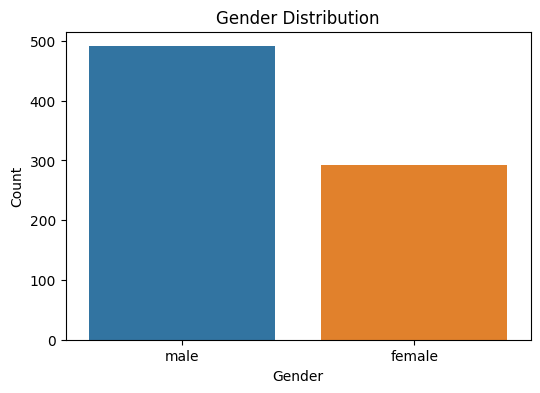

In [100]:
# Bar graph for gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

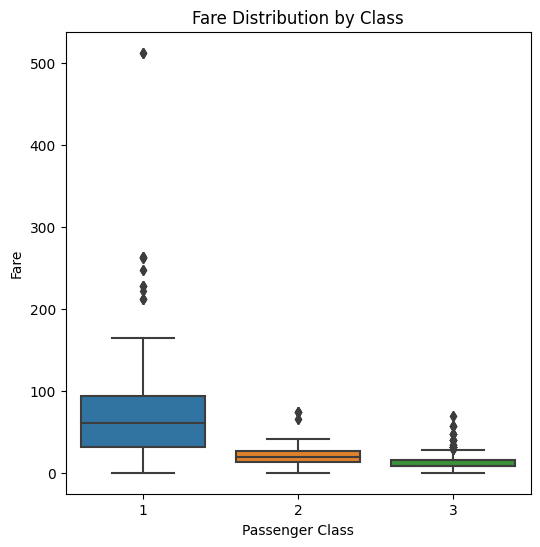

In [103]:
# Box plot for fare distribution by class
plt.figure(figsize=(6, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

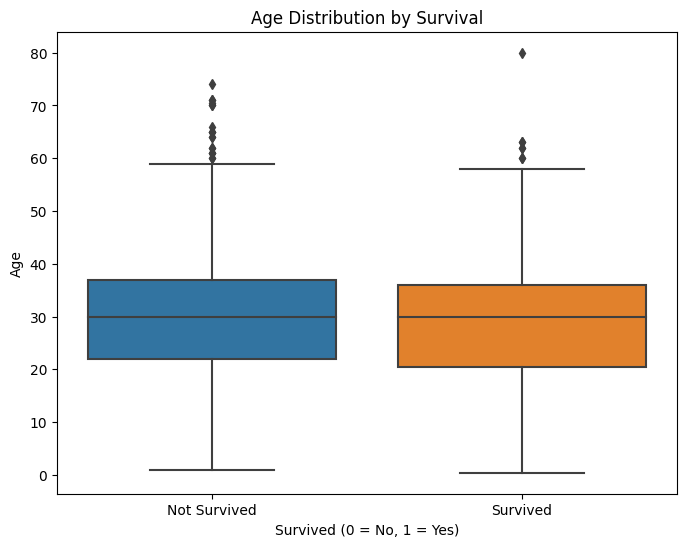

In [104]:
# Box plot for age distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

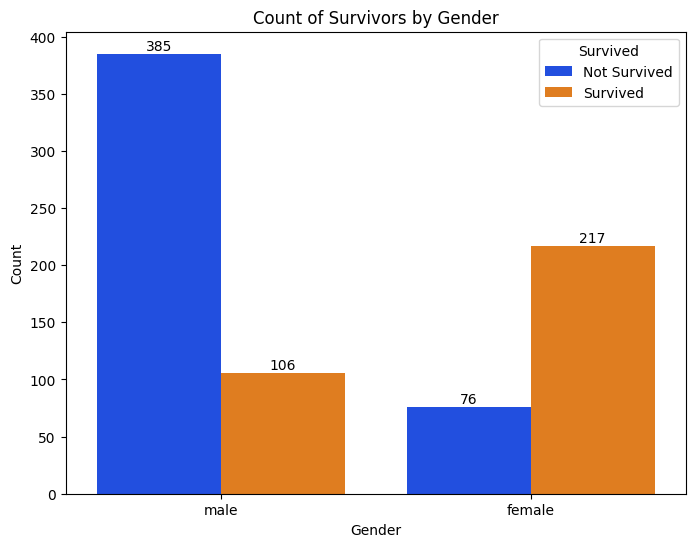

In [90]:
# Count plot for survival by gender
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='survived', data=df, palette='bright')
plt.title('Count of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

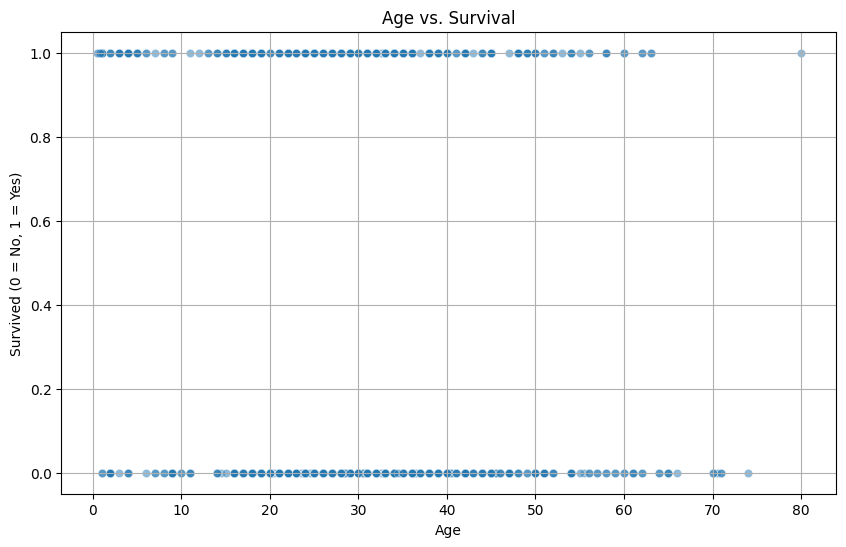

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='survived', data=df, alpha=0.5)
plt.title('Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.grid()
plt.show()

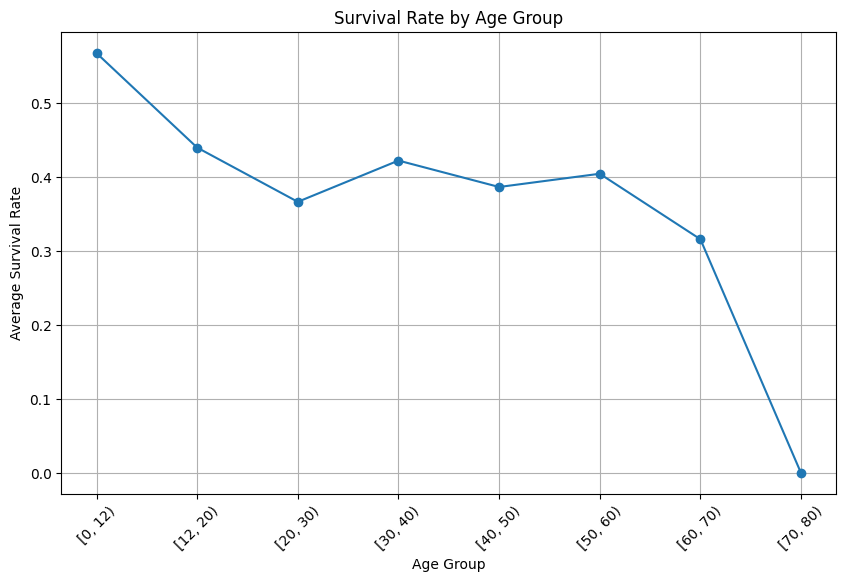

In [123]:
# Bin ages into categories
age_bins = pd.cut(df['age'], bins=[0, 12, 20, 30, 40, 50, 60, 70, 80], right=False)
survival_rate_by_age = df.groupby(age_bins)['survived'].mean()

plt.figure(figsize=(10, 6))
plt.plot(survival_rate_by_age.index.astype(str), survival_rate_by_age, marker='o')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Survival Rate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

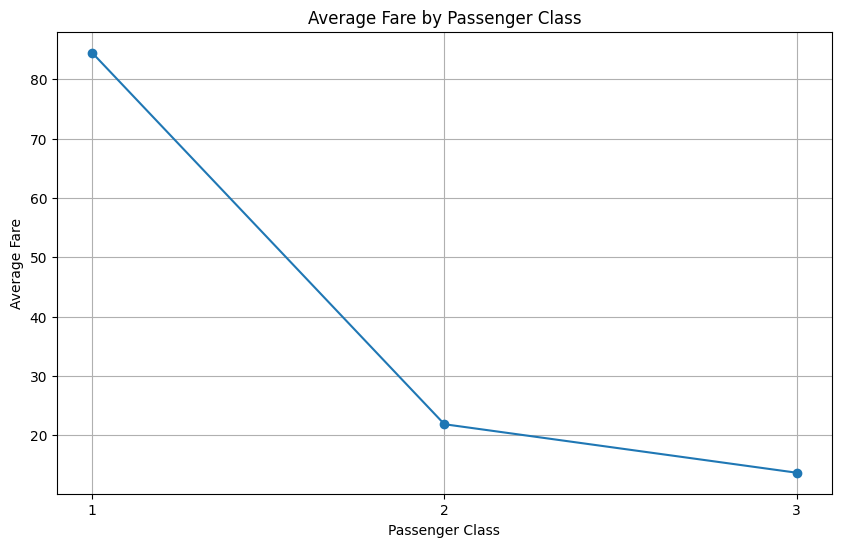

In [122]:
average_fare_by_class = df.groupby('pclass')['fare'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_fare_by_class.index, average_fare_by_class, marker='o')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks([1, 2, 3])
plt.grid()
plt.show()

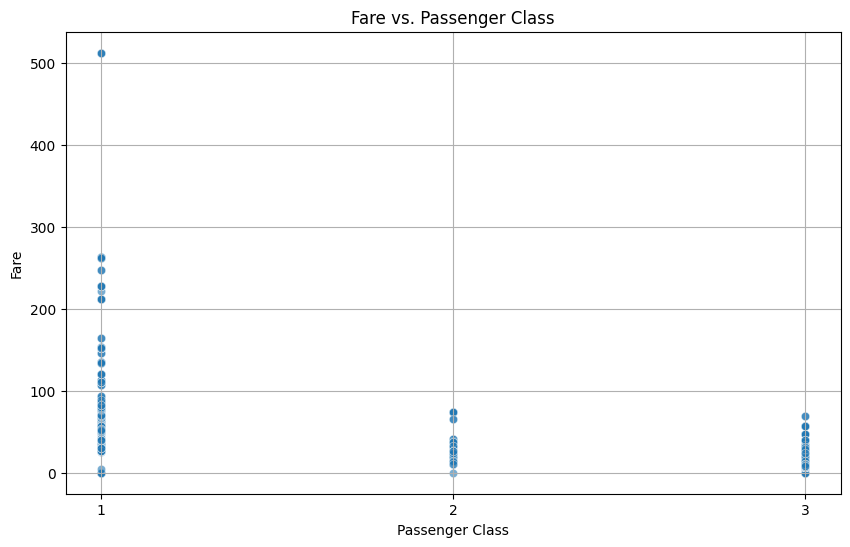

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pclass', y='fare', data=df, alpha=0.6)
plt.title('Fare vs. Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([1, 2, 3])
plt.grid()
plt.show()

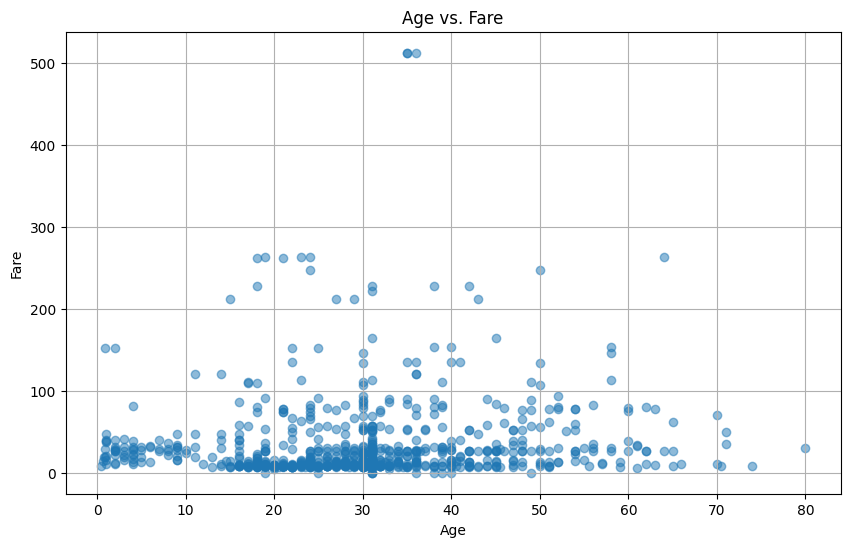

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['fare'], alpha=0.5)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()

<AxesSubplot:xlabel='fare', ylabel='Density'>

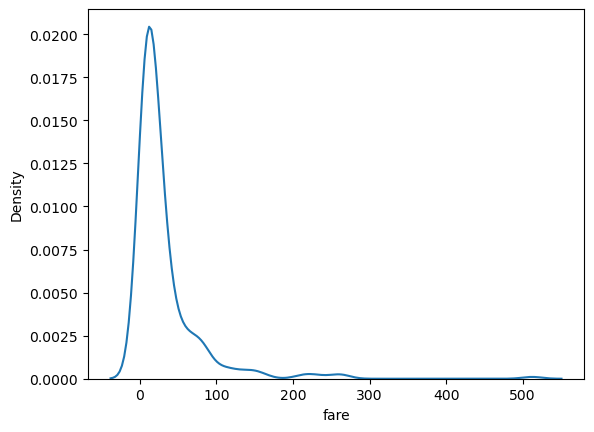

In [35]:
#A kde plot depicts the probability density at different values in a continuous variable.The graph shows a normal/symmetrical
#sign
sns.kdeplot(df['fare'])

## THE DATA SET IS NOW SPLITTED INTO 2 PARTS:
    X=> which displays the feature/predictor variables and
    Y=> which displays the target/response variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [38]:
X=df.drop("survived",axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [40]:
Y= df["survived"].copy()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [58]:
from sklearn.ensemble import AdaBoostClassifier
clf1 =AdaBoostClassifier(base_estimator=AdaBoostClassifier(), n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model on the training data
clf1.fit(X_train, Y_train)

# Evaluate the model on the testing data
accuracy1 = clf1.score(X_test, Y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [62]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
clf2.fit(X_train,Y_train)
accuracy2 = clf2.score(X_test,Y_test)
print("Accuracy:{:.2f}%".format(accuracy2 * 100))

Accuracy:100.00%


In [65]:
clf1.predict(X_train)
clf1.predict_proba(X_train)

array([[1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       ...,
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16]])